#Click for the dataset used:
[Dataset from Kaggle](https://www.kaggle.com/datasets/salvatorerastelli/spotify-and-youtube?datasetId=3025170&sortBy=commentCount)

In [6]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

In [7]:
#Load in dataset
df = pd.read_csv('Spotify_Youtube.csv')

In [8]:
#See what im working with
print(df.head)

<bound method NDFrame.head of        Unnamed: 0       Artist  \
0               0     Gorillaz   
1               1     Gorillaz   
2               2     Gorillaz   
3               3     Gorillaz   
4               4     Gorillaz   
...           ...          ...   
20713       20713  SICK LEGEND   
20714       20714  SICK LEGEND   
20715       20715  SICK LEGEND   
20716       20716  SICK LEGEND   
20717       20717  SICK LEGEND   

                                             Url_spotify  \
0      https://open.spotify.com/artist/3AA28KZvwAUcZu...   
1      https://open.spotify.com/artist/3AA28KZvwAUcZu...   
2      https://open.spotify.com/artist/3AA28KZvwAUcZu...   
3      https://open.spotify.com/artist/3AA28KZvwAUcZu...   
4      https://open.spotify.com/artist/3AA28KZvwAUcZu...   
...                                                  ...   
20713  https://open.spotify.com/artist/3EYY5FwDkHEYLw...   
20714  https://open.spotify.com/artist/3EYY5FwDkHEYLw...   
20715  https://open.s

In [9]:
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20718 entries, 0 to 20717
Data columns (total 28 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Unnamed: 0        20718 non-null  int64  
 1   Artist            20718 non-null  object 
 2   Url_spotify       20718 non-null  object 
 3   Track             20718 non-null  object 
 4   Album             20718 non-null  object 
 5   Album_type        20718 non-null  object 
 6   Uri               20718 non-null  object 
 7   Danceability      20716 non-null  float64
 8   Energy            20716 non-null  float64
 9   Key               20716 non-null  float64
 10  Loudness          20716 non-null  float64
 11  Speechiness       20716 non-null  float64
 12  Acousticness      20716 non-null  float64
 13  Instrumentalness  20716 non-null  float64
 14  Liveness          20716 non-null  float64
 15  Valence           20716 non-null  float64
 16  Tempo             20716 non-null  float6

In [10]:
print(df.isnull().sum())

Unnamed: 0            0
Artist                0
Url_spotify           0
Track                 0
Album                 0
Album_type            0
Uri                   0
Danceability          2
Energy                2
Key                   2
Loudness              2
Speechiness           2
Acousticness          2
Instrumentalness      2
Liveness              2
Valence               2
Tempo                 2
Duration_ms           2
Url_youtube         470
Title               470
Channel             470
Views               470
Likes               541
Comments            569
Description         876
Licensed            470
official_video      470
Stream              576
dtype: int64


In [11]:
#Is MAR and less than 5%
df.dropna(inplace=True)

In [12]:
#Is repeat of place holders
Unnecessary = ['Unnamed: 0']
df.drop(columns=Unnecessary, inplace=True)

In [13]:
duplicates = df.duplicated()

print(df[duplicates])

Empty DataFrame
Columns: [Artist, Url_spotify, Track, Album, Album_type, Uri, Danceability, Energy, Key, Loudness, Speechiness, Acousticness, Instrumentalness, Liveness, Valence, Tempo, Duration_ms, Url_youtube, Title, Channel, Views, Likes, Comments, Description, Licensed, official_video, Stream]
Index: []

[0 rows x 27 columns]


In [14]:
album_type_count = df['Album_type'].value_counts()
print(album_type_count)

album          13845
single          4636
compilation      689
Name: Album_type, dtype: int64


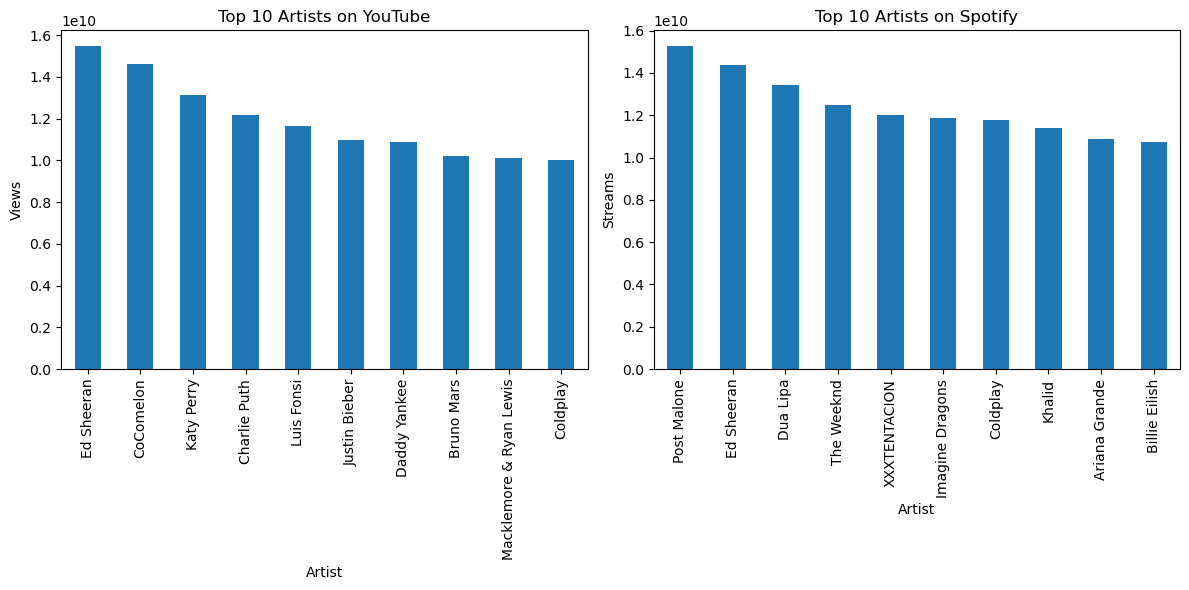

In [15]:
#DataFrames for views and streams
df_views = df.groupby('Artist')['Views'].sum().sort_values(ascending=False)[:10]
df_streams = df.groupby('Artist')['Stream'].sum().sort_values(ascending=False)[:10]

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12,6))

# top 10 yt
ax1.set_title('Top 10 Artists on YouTube')
df_views.plot(kind='bar', ax=ax1)

# top 10 spotofy
ax2.set_title('Top 10 Artists on Spotify')
df_streams.plot(kind='bar', ax=ax2)

ax1.set_xlabel('Artist')
ax1.set_ylabel('Views')
ax2.set_xlabel('Artist')
ax2.set_ylabel('Streams')
fig.tight_layout()
plt.show()

/var/folders/pv/ty_20q315_d0cf7s141f02lm0000gn/T/ipykernel_48359/1812447331.py:3: UserWarning: To output multiple subplots, the figure containing the passed axes is being cleared.
  df.hist(ax = ax)


array([[<AxesSubplot:title={'center':'Danceability'}>,
        <AxesSubplot:title={'center':'Energy'}>,
        <AxesSubplot:title={'center':'Key'}>,
        <AxesSubplot:title={'center':'Loudness'}>],
       [<AxesSubplot:title={'center':'Speechiness'}>,
        <AxesSubplot:title={'center':'Acousticness'}>,
        <AxesSubplot:title={'center':'Instrumentalness'}>,
        <AxesSubplot:title={'center':'Liveness'}>],
       [<AxesSubplot:title={'center':'Valence'}>,
        <AxesSubplot:title={'center':'Tempo'}>,
        <AxesSubplot:title={'center':'Duration_ms'}>,
        <AxesSubplot:title={'center':'Views'}>],
       [<AxesSubplot:title={'center':'Likes'}>,
        <AxesSubplot:title={'center':'Comments'}>,
        <AxesSubplot:title={'center':'Stream'}>, <AxesSubplot:>]],
      dtype=object)

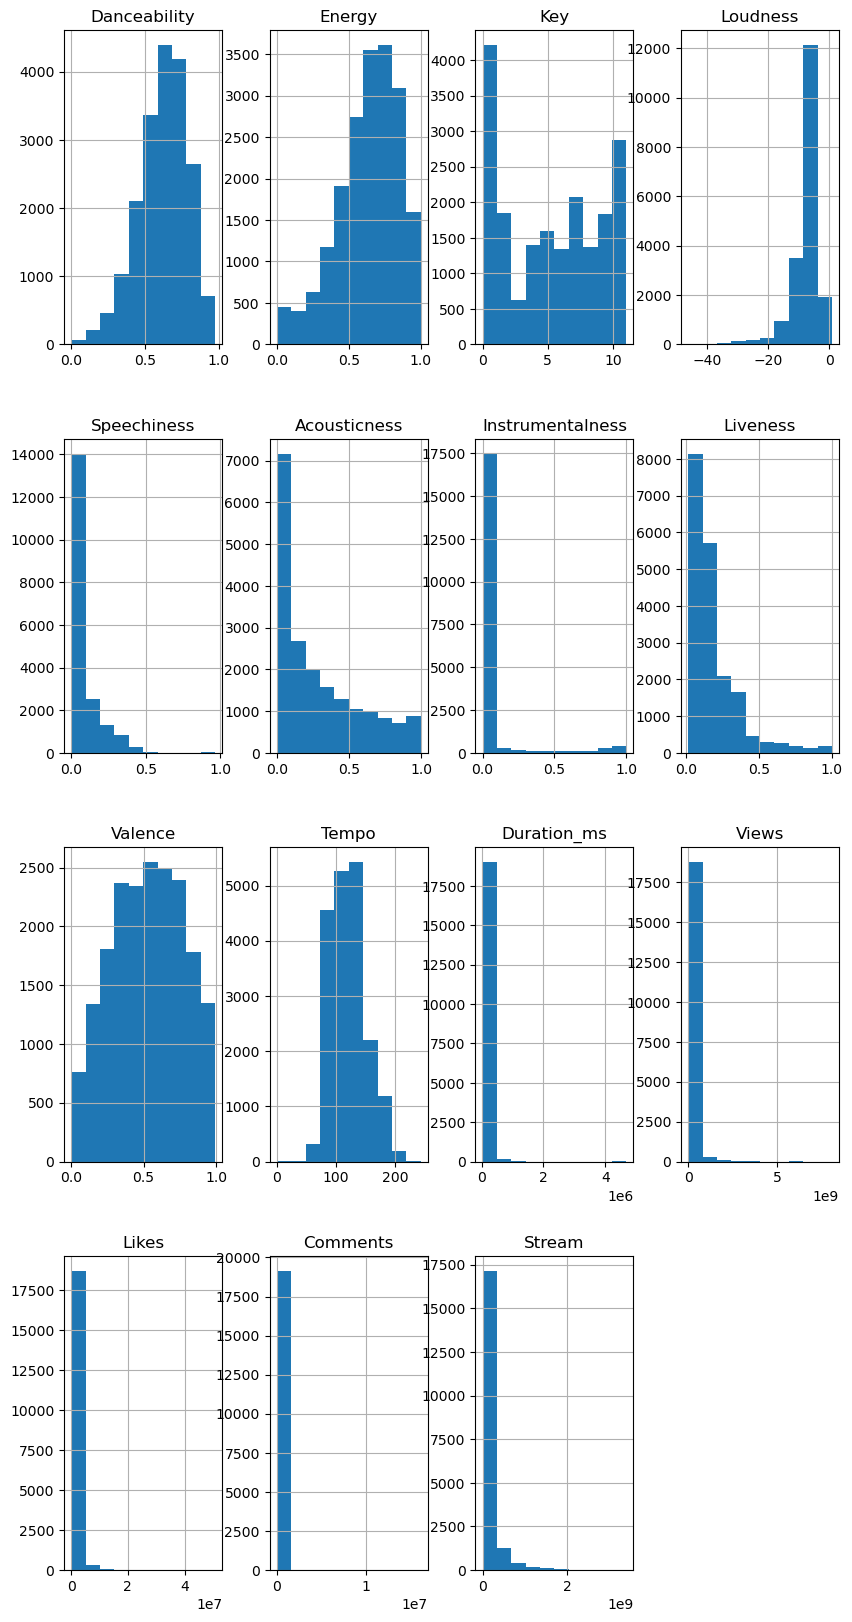

In [16]:
fig = plt.figure(figsize = (10,20))
ax = fig.gca()
df.hist(ax = ax)

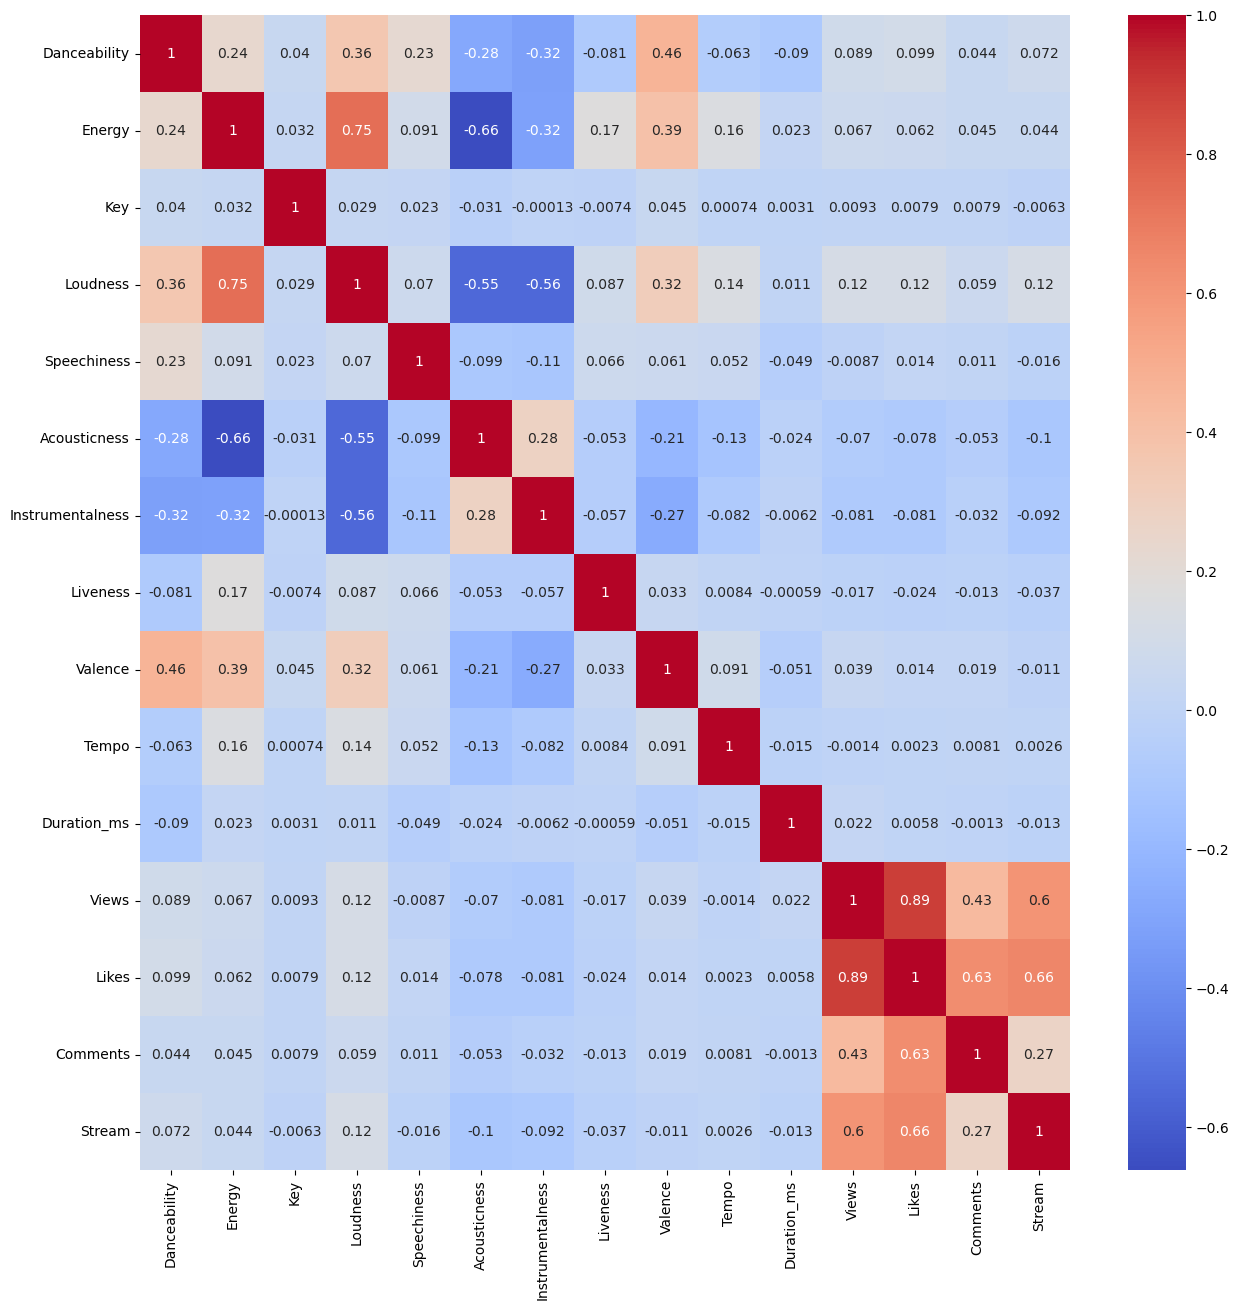

In [17]:
num_columns= df.select_dtypes(include=[np.number]).columns.tolist()

corr= df[num_columns].corr()

plt.figure(figsize=(15,15))
sns.heatmap(corr, annot=True, cmap='coolwarm');

In [18]:
'We can see from the graphs above there is not much correlation between the top 10 YouTube artist and Spotify artist as they are artist that are not shared between them. There also is correlation between views, likes, comments and stream looking at the heat map. '

'We can see from the graphs above there is not much correlation between the top 10 YouTube artist and Spotify artist as they are artist that are not shared between them. There also is correlation between views, likes, comments and stream looking at the heat map. '